In [2]:
#Install required libraries
pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [1]:
# Load the Data
import pandas as pd

customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")


In [2]:
# Check for Missing Values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [3]:
# Convert columns like TransactionDate and SignupDate to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [4]:
# Remove duplicates
customers = customers.drop_duplicates()
products = products.drop_duplicates()
transactions = transactions.drop_duplicates()


In [5]:
# Exploring data
print(customers.describe())
print(products.describe())
print(transactions.describe())


       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  179
top         C0001  Lawrence Carroll  South America  2024-11-11 00:00:00
freq            1                 1             59                    3
first         NaN               NaN            NaN  2022-01-22 00:00:00
last          NaN               NaN            NaN  2024-12-28 00:00:00
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.6

C:\Users\DELL\AppData\Local\Temp\ipykernel_24392\3284842801.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(customers.describe())


In [6]:
# Merge datasets for easier analysis
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")


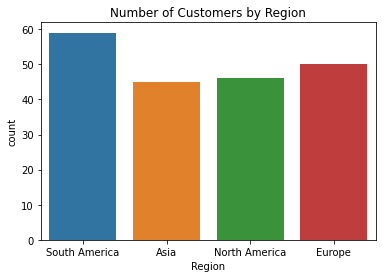

In [7]:
# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Region', data=customers)
plt.title('Number of Customers by Region')
plt.show()


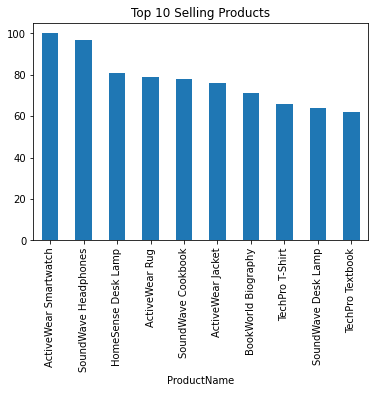

In [8]:
# Top selling products
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Selling Products')
plt.show()


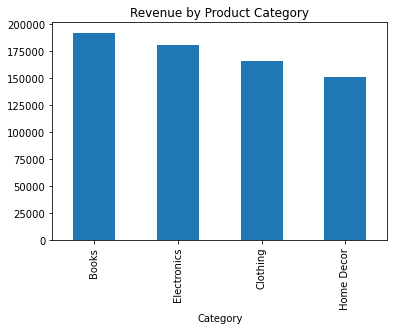

In [9]:
# Revenue by Product Category

category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', title='Revenue by Product Category')
plt.show()


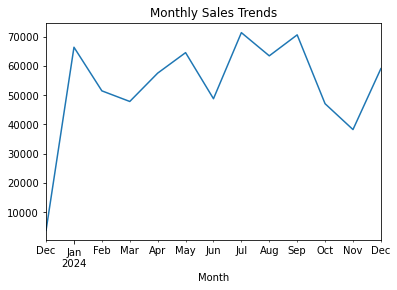

In [10]:
# Monthly Sales Trends

merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(title='Monthly Sales Trends')
plt.show()


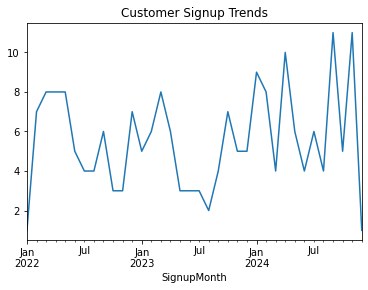

In [11]:
# Customer Signup Trends

customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers.groupby('SignupMonth')['CustomerID'].count()
signup_trends.plot(title='Customer Signup Trends')
plt.show()


In [12]:
# High-Value Customers (Revenue Contribution)

high_value_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
top_customers = high_value_customers.head(int(len(high_value_customers) * 0.1))
print(f"Top 10% of customers contribute {top_customers.sum() / high_value_customers.sum() * 100:.2f}% of revenue.")


Top 10% of customers contribute 19.11% of revenue.


In [13]:
# Low-Performing Products

low_selling_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values().head(10)
print(low_selling_products)


ProductName
ComfortLiving Laptop            647.76
ActiveWear T-Shirt              795.34
ComfortLiving Rug              1063.81
SoundWave Bluetooth Speaker    1223.22
ComfortLiving Desk Lamp        1694.16
BookWorld Rug                  1722.42
ComfortLiving Headphones       2394.00
BookWorld Bluetooth Speaker    2790.15
HomeSense Headphones           2860.74
ActiveWear Biography           3047.40
Name: TotalValue, dtype: float64


In [14]:
# Customer Retention

repeat_customers = merged_data.groupby('CustomerID').size()
repeat_rate = (repeat_customers[repeat_customers > 1].count() / repeat_customers.count()) * 100
print(f"Repeat customer rate: {repeat_rate:.2f}%")


Repeat customer rate: 93.97%


In [15]:
# Product Bundling Opportunities

from itertools import combinations
from collections import Counter

transactions_grouped = merged_data.groupby('TransactionID')['ProductName'].apply(list)
product_combinations = Counter([combo for items in transactions_grouped for combo in combinations(items, 2)])
print(product_combinations.most_common(5))


[]


In [16]:
# Geographical Insights

region_revenue = merged_data.groupby('Region')['TotalValue'].sum()
region_transactions = merged_data.groupby('Region')['TransactionID'].count()
print(region_revenue)
print(region_transactions)


Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64
Region
Asia             218
Europe           234
North America    244
South America    304
Name: TransactionID, dtype: int64


In [17]:
# Signup-to-Purchase Time Analysis

first_purchase = merged_data.groupby('CustomerID')['TransactionDate'].min()
signup_dates = customers.set_index('CustomerID')['SignupDate']
time_to_purchase = (first_purchase - signup_dates).dt.days
print(f"Average signup-to-purchase time: {time_to_purchase.mean():.2f} days")


Average signup-to-purchase time: 228.76 days


In [18]:
# Sales Trends by Weekday

merged_data['Weekday'] = merged_data['TransactionDate'].dt.day_name()
weekday_sales = merged_data.groupby('Weekday')['TotalValue'].sum().sort_values(ascending=False)
print(weekday_sales)


Weekday
Wednesday    119203.15
Tuesday      108567.61
Monday       101984.33
Thursday      99202.71
Sunday        92605.93
Friday        87032.09
Saturday      81399.74
Name: TotalValue, dtype: float64


In [19]:
# Customer Churn Analysis (One-Time Buyers)

churned_customers = repeat_customers[repeat_customers == 1].count()
churn_rate = (churned_customers / repeat_customers.count()) * 100
print(f"Customer churn rate: {churn_rate:.2f}%")


Customer churn rate: 6.03%


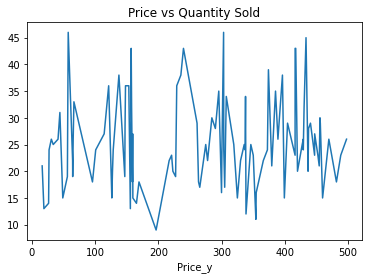

In [24]:
# Price Sensitivity Analysis
price_sales = merged_data.groupby('Price_y')['Quantity'].sum()
price_sales.plot(title='Price vs Quantity Sold')
plt.show()



In [25]:
# Clean Up the Data 
merged_data = merged_data.drop(columns=['Price_x'])
merged_data = merged_data.rename(columns={'Price_y': 'Price'})


In [26]:
# Lifetime Value (LTV) Analysis

ltv = merged_data.groupby('CustomerID')['TotalValue'].sum()
print(f"Average Lifetime Value: {ltv.mean():.2f}")


Average Lifetime Value: 3467.31
